Importing Necessary packages

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import nltk
import re
from nltk.corpus import stopwords
import string


Imporing Dataset


In [ ]:
data = pd.read_csv("filename.csv")
print(data.head())

             id  conversation_id               created_at        date  \
0  1.586890e+18     1.586890e+18  2022-10-31 01:08:02 UTC  31-10-2022   
1  1.586890e+18     1.586780e+18  2022-10-31 01:08:02 UTC  31-10-2022   
2  1.586890e+18     1.586630e+18  2022-10-31 01:08:02 UTC  31-10-2022   
3  1.586890e+18     1.586380e+18  2022-10-31 01:08:02 UTC  31-10-2022   
4  1.586890e+18     1.586860e+18  2022-10-31 01:08:01 UTC  31-10-2022   

       time  timezone       user_id        username           name place  ...  \
0  01:08:02         0  9.066700e+17  huertaarreguin  juan arreguin   NaN  ...   
1  01:08:02         0  1.316454e+08          l12345   Luc Tremblay   NaN  ...   
2  01:08:02         0  1.570540e+18   goldenfellaus   Golden Fella   NaN  ...   
3  01:08:02         0  4.633962e+07     freegazaorg    freegazaorg   NaN  ...   
4  01:08:01         0  1.262120e+18   theladorlando      NicholasB   NaN  ...   

  geo source user_rt_id user_rt retweet_id  \
0 NaN    NaN        NaN     

Let’s have a quick look at all the column names of the dataset:

In [ ]:
print(data.columns)

Index(['id', 'conversation_id', 'created_at', 'date', 'time', 'timezone',
       'user_id', 'username', 'name', 'place', 'tweet', 'language', 'mentions',
       'urls', 'photos', 'replies_count', 'retweets_count', 'likes_count',
       'hashtags', 'cashtags', 'link', 'retweet', 'quote_url', 'video',
       'thumbnail', 'near', 'geo', 'source', 'user_rt_id', 'user_rt',
       'retweet_id', 'reply_to', 'retweet_date', 'translate', 'trans_src',
       'trans_dest'],
      dtype='object')


We only need three columns for this task (username, tweet, and language); I will only select these columns and move forward:

In [ ]:
data=data[["username","tweet","language"]]

Let’s have a look at whether any of these columns contains any null values or not:

In [ ]:
data.isnull().sum()

username    0
tweet       0
language    0
dtype: int64

So none of the columns has null values, let’s have a quick look at how many tweets are posted in which language:

In [ ]:
data["language"].value_counts()

en     8655
pt      632
it      198
qme      91
in       82
es       63
und      60
fi       49
ca       30
ru       27
qht      17
ja       17
nl       10
pl       10
fr        9
de        8
th        7
ro        7
ar        6
zh        4
tl        4
uk        4
qam       3
hi        3
ur        2
sv        2
cy        2
tr        2
et        2
ht        1
da        1
cs        1
ko        1
sr        1
vi        1
is        1
Name: language, dtype: int64

So most of the tweets are in English. Let’s prepare this data for the task of sentiment analysis. Here I will remove all the links, punctuation, symbols and other language errors from the tweets:

In [ ]:
nltk.download('stopwords')
stemmer = nltk.SnowballStemmer("english")
stopword=set(stopwords.words('english'))

def clean(text):
    text = str(text).lower()
    text = re.sub('\[.*?\]', '', text)
    text = re.sub('https?://\S+|www\.\S+', '', text)
    text = re.sub('<.*?>+', '', text)
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub('\n', '', text)
    text = re.sub('\w*\d\w*', '', text)
    text = [word for word in text.split(' ') if word not in stopword]
    text=" ".join(text)
    text = [stemmer.stem(word) for word in text.split(' ')]
    text=" ".join(text)
    return text
data["tweet"] = data["tweet"].apply(clean)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


Now let’s have a look at the wordcloud of the tweets, which will show the most frequently used words in the tweets by people sharing their feelings and updates about the Ukraine and Russia war:

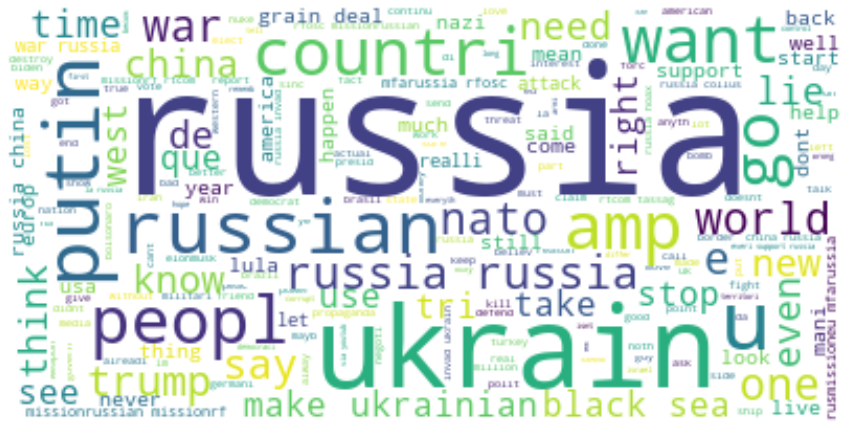

In [ ]:
text = " ".join(i for i in data.tweet)
stopwords = set(STOPWORDS)
wordcloud = WordCloud(stopwords=stopwords, background_color="white").generate(text)
plt.figure( figsize=(15,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

Now I will add three more columns in this dataset as Positive, Negative, and Neutral by calculating the sentiment scores of the tweets:

In [ ]:
nltk.download('vader_lexicon')
sentiments = SentimentIntensityAnalyzer()
data["Positive"] = [sentiments.polarity_scores(i)["pos"] for i in data["tweet"]]
data["Negative"] = [sentiments.polarity_scores(i)["neg"] for i in data["tweet"]]
data["Neutral"] = [sentiments.polarity_scores(i)["neu"] for i in data["tweet"]]
data = data[["tweet", "Positive", "Negative", "Neutral"]]
print(data.head())

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


                                               tweet  Positive  Negative  \
0  putin special militari oper amp denazif nazi u...     0.085     0.000   
1  kyivindepend wonder russian prepar kherson may...     0.000     0.279   
2  rusmissioneu mfarussia rfosc missionrussian mi...     0.000     0.000   
3   natyliesb true time saw russia weak need push...     0.120     0.239   
4  mhstudentuon  narrat preced  year illegitim pr...     0.000     0.000   

   Neutral  
0    0.915  
1    0.721  
2    1.000  
3    0.641  
4    1.000  


Now let’s have a look at the most frequent words used by people with positive sentiments:

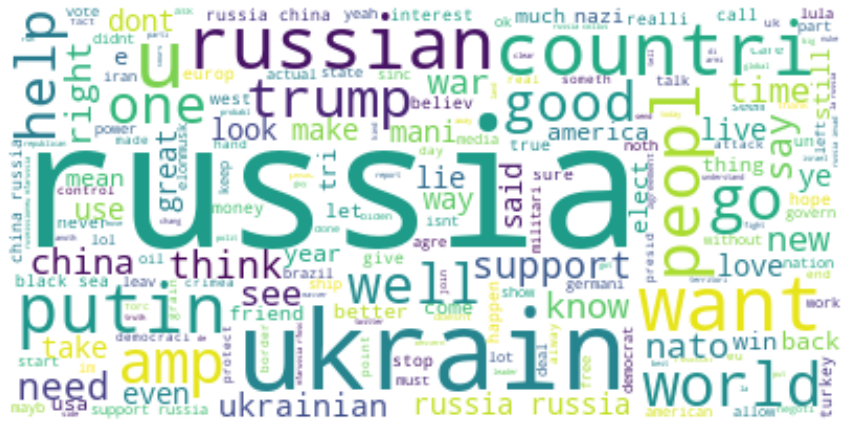

In [ ]:
positive =' '.join([i for i in data['tweet'][data['Positive'] > data["Negative"]]])
stopwords = set(STOPWORDS)
wordcloud = WordCloud(stopwords=stopwords, background_color="white").generate(positive)
plt.figure( figsize=(15,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

Now let’s have a look at the most frequent words used by people with negative sentiments:

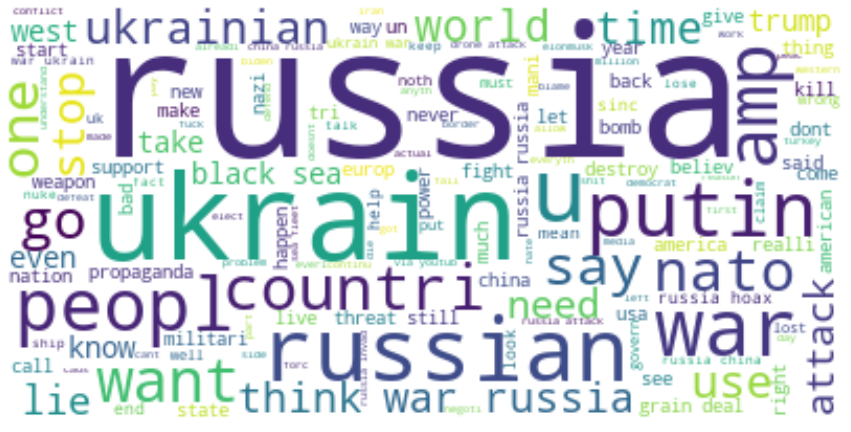

In [ ]:
negative =' '.join([i for i in data['tweet'][data['Negative'] > data["Positive"]]])
stopwords = set(STOPWORDS)
wordcloud = WordCloud(stopwords=stopwords, background_color="white").generate(negative)
plt.figure( figsize=(15,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

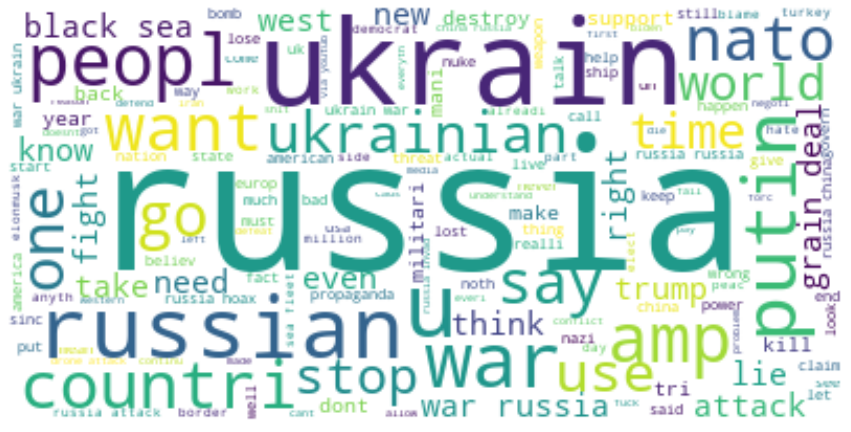

In [ ]:
neutral =' '.join([i for i in data['tweet'][data['Neutral'] > data["Positive"]]])
stopwords = set(STOPWORDS)
wordcloud = WordCloud(stopwords=stopwords, background_color="white").generate(negative)
plt.figure( figsize=(15,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()
